<a href="https://colab.research.google.com/github/Revanth0710/AI-MLEngineer/blob/main/PlacementPrdectionRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Pipeline: Placement Prediction
Steps
0. Preprocess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model
     

In [1]:

import numpy as np
import pandas as pd

**Step 0: Preprocess + EDA + Feature Selection**
Goals:

Load the data

Explore structure, missing values

Basic visualization

Decide which features to use or drop

In [2]:
# Load the CSV
df = pd.read_csv('/content/placement (1).csv')

In [3]:
# See shape and first few rows
print("Shape:", df.shape)
print(df.head())

Shape: (100, 4)
   Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0


In [4]:
# Data types and missing values
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB
None
Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64


In [5]:
# Drop index col
df = df.iloc[:,1:]

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


**EDA**

In [7]:
# Describe numerics
print(df.describe())

             cgpa          iq   placement
count  100.000000  100.000000  100.000000
mean     5.991000  123.580000    0.500000
std      1.143634   39.944198    0.502519
min      3.300000   37.000000    0.000000
25%      5.075000  101.500000    0.000000
50%      6.000000  127.500000    0.500000
75%      6.900000  149.000000    1.000000
max      8.500000  233.000000    1.000000


In [8]:
import matplotlib.pyplot as plt


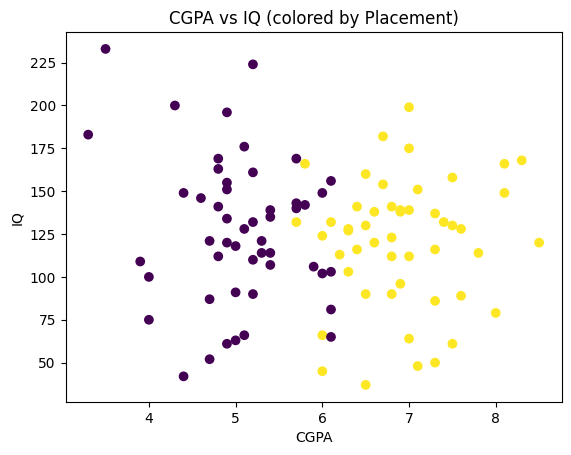

In [9]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('CGPA vs IQ (colored by Placement)')
plt.show()


In [10]:
# 1. Extract Input and Output Columns

X = df.iloc[:, 0:2]  # 'cgpa', 'iq' Independent Var
y = df.iloc[:, -1]   # 'placement'. Dependant Var


In [11]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [12]:
y.head()

,placement
0,1
1,0
2,0
3,1
4,0


In [13]:
# 3. Train-Test Split


from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [14]:
X_train

,cgpa,iq
27,6.0,124.0
59,4.8,112.0
86,5.1,128.0
72,7.3,116.0
21,7.1,151.0
...,...,...
77,7.3,50.0
34,4.8,163.0
38,6.5,160.0
75,4.8,169.0


In [15]:
X_test

,cgpa,iq
74,6.7,154.0
88,4.4,149.0
95,4.3,200.0
94,4.7,52.0
42,7.6,89.0
2,5.3,121.0
45,6.0,66.0
56,6.1,65.0
57,6.5,130.0
53,8.3,168.0


In [16]:
y_train

,placement
27,1
59,0
86,0
72,1
21,1
...,...
77,1
34,0
38,1
75,0


In [17]:
y_test

,placement
74,1
88,0
95,0
94,0
42,1
2,0
45,1
56,0
57,1
53,1


Scaling the Values: What and Why?
What is this step doing?

StandardScaler transforms your features (X) so they have:

Mean = 0

Standard Deviation = 1

Why do we scale?

Many machine learning algorithms (like Logistic Regression, SVM, KNN) work better if all features are on a similar scale.

If one feature (say, IQ: 0–200) is much larger than another (say, CGPA: 0–10), the model could pay too much attention to the big-range feature.

Scaling makes sure all features contribute equally.

scaled_value = (original_value - mean) / std

In [18]:
# 2. Scale the Values
from sklearn.preprocessing import StandardScaler  # Import the scaler



In [19]:
scaler = StandardScaler()        # Create the scaler object



In [20]:

X_train = scaler.fit_transform(X_train)

In [21]:

X_train

array([[ 7.92399308e-03, -1.14568585e-03],
       [-1.06181507e+00, -3.10480865e-01],
       [-7.94380307e-01,  1.01966041e-01],
       [ 1.16680798e+00, -2.07369139e-01],
       [ 9.88518137e-01,  6.94858468e-01],
       [ 9.88518137e-01, -1.96026849e+00],
       [-1.24010492e+00,  5.65968810e-01],
       [-2.59510773e-01,  4.11301220e-01],
       [-2.39898891e+00,  1.51975228e+00],
       [-7.05235384e-01,  2.05077767e-01],
       [-1.77497445e+00, -1.26426433e+00],
       [ 9.70689153e-02, -1.10959675e+00],
       [-9.72670151e-01,  1.85486539e+00],
       [ 2.75358760e-01,  7.61881090e-02],
       [ 7.92399308e-03, -5.68260181e-01],
       [ 3.64503682e-01, -2.07369139e-01],
       [-9.72670151e-01, -1.04257412e-01],
       [ 1.34509783e+00,  1.53521904e-01],
       [ 1.25595290e+00,  2.05077767e-01],
       [ 8.99373215e-01,  3.85523288e-01],
       [ 8.99373215e-01,  1.31352883e+00],
       [-1.06181507e+00,  4.37079152e-01],
       [-2.59510773e-01,  4.88635015e-01],
       [ 5.

In [22]:
X_test = scaler.transform(X_test)


In [23]:
X_test

array([[ 0.63193845,  0.77219226],
       [-1.41839476,  0.6433026 ],
       [-1.50753968,  1.95797712],
       [-1.15096   , -1.85715676],
       [ 1.43424275, -0.90337329],
       [-0.61609046, -0.07847948],
       [ 0.00792399, -1.49626572],
       [ 0.09706892, -1.52204365],
       [ 0.4536486 ,  0.1535219 ],
       [ 2.0582572 ,  1.13308331]])

In [24]:
# 4. Train the Model

from sklearn.linear_model import LogisticRegression



In [25]:
clf = LogisticRegression()

In [26]:
clf.fit(X_train, y_train)

LogisticRegression()

In [27]:

y_pred = clf.predict(X_test)

In [28]:
y_test

,placement
74,1
88,0
95,0
94,0
42,1
2,0
45,1
56,0
57,1
53,1


In [29]:
from sklearn.metrics import accuracy_score




In [30]:
accuracy_score(y_test,y_pred)

0.9

In [31]:
from mlxtend.plotting import plot_decision_regions

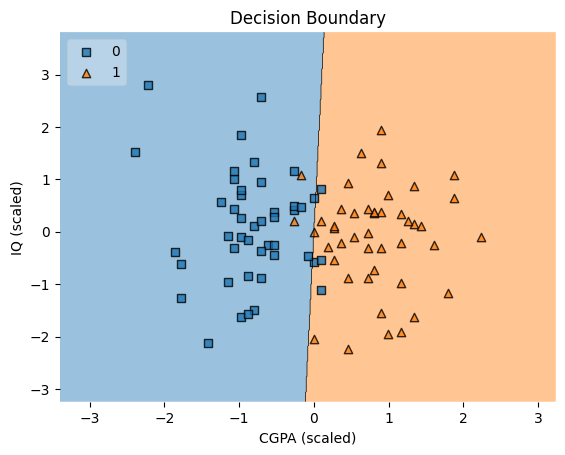

In [32]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)
plt.xlabel('CGPA (scaled)')
plt.ylabel('IQ (scaled)')
plt.title('Decision Boundary')
plt.show()
